In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [57]:
df = pd.read_csv('Mall_Customers.csv')
print("Dataset Overview:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descriptive S

In [59]:
# Step 2: Load and inspect data
def load_data():
    """Load and inspect customer data"""
    df = pd.read_csv('Mall_Customers.csv')
    print("Data loaded successfully!")
    print(f"Shape: {df.shape} rows and columns")
    print("\nFirst 5 records:")
    print(df.head())
    return df

In [61]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

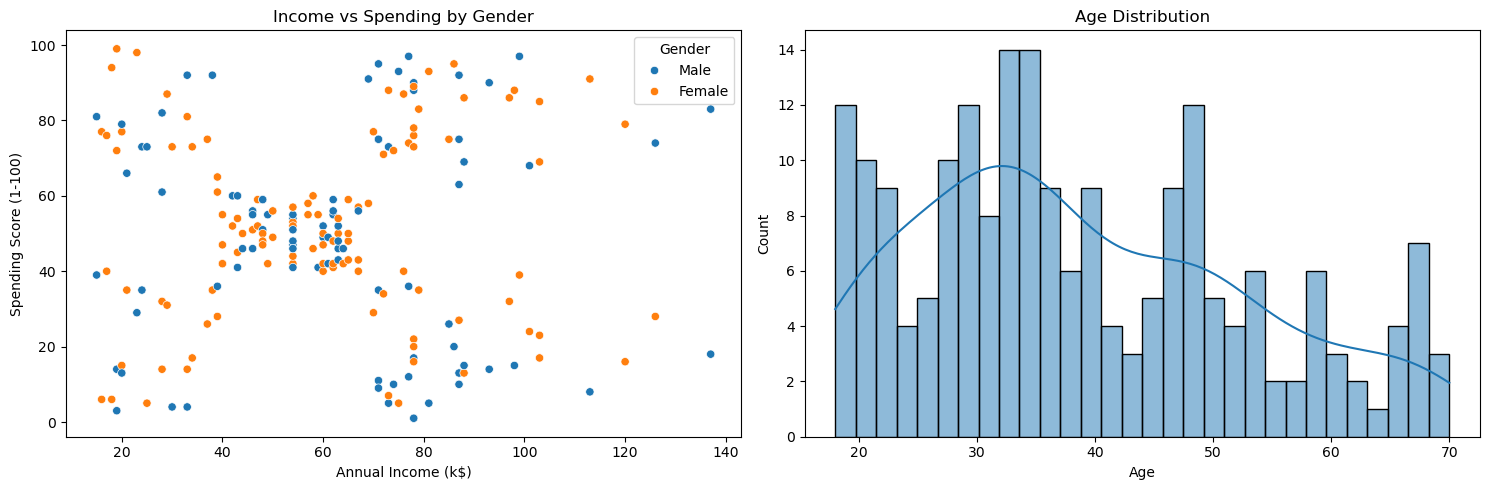

In [63]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Income vs Spending by Gender')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

In [65]:
# Step 3: Preprocess data
def preprocess_data(df):
    """Select and scale features"""
    # Select relevant features
    X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("\nFeatures scaled for clustering")
    return X, X_scaled, scaler

In [67]:
# Step 4: Train clustering model
def train_model(X_scaled):
    """Train K-means clustering model"""
    kmeans = KMeans(
        n_clusters=5,          # Optimal number of clusters
        random_state=42,       # For reproducibility
        n_init=10,             # Number of initializations
        max_iter=300           # Maximum iterations
    )
    kmeans.fit(X_scaled)
    print("Model trained successfully!")
    return kmeans


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score
    if k > 1:  # Silhouette requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

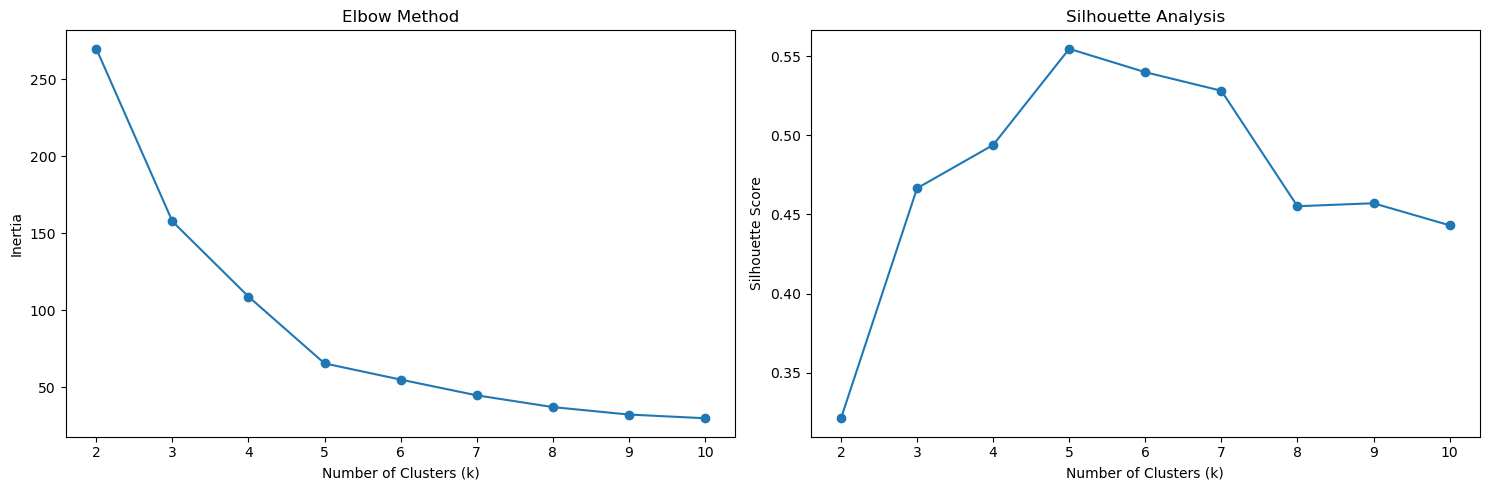

In [73]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [75]:
optimal_k = 5 

In [77]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


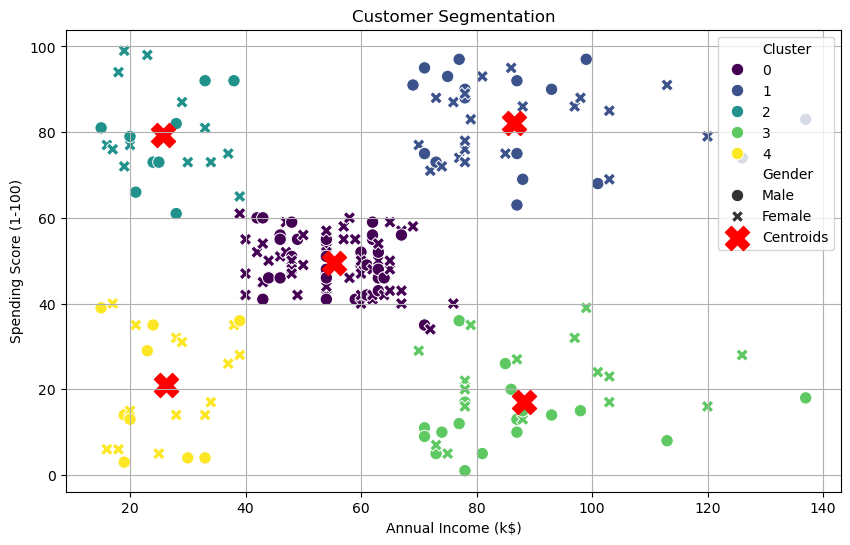

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    data=df, 
    hue='Cluster', 
    palette='viridis',
    style='Gender',
    s=80
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=300, 
    c='red',
    marker='X',
    label='Centroids'
)
plt.title('Customer Segmentation')
plt.legend()
plt.grid(True)
plt.show()


In [81]:
cluster_analysis = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'median', 'min', 'max'],
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0],
    'CustomerID': 'count'
}).reset_index()
cluster_analysis.columns = [
    'Cluster', 
    'Avg Income', 
    'Median Income', 
    'Min Income', 
    'Max Income',
    'Avg Spending', 
    'Median Spending', 
    'Min Spending', 
    'Max Spending',
    'Avg Age',
    'Dominant Gender',
    'Customer Count'
]
print("\nCluster Analysis:")
print(cluster_analysis)




Cluster Analysis:
   Cluster  Avg Income  Median Income  Min Income  Max Income  Avg Spending  \
0        0   55.296296           54.0          39          76     49.518519   
1        1   86.538462           79.0          69         137     82.128205   
2        2   25.727273           24.5          15          39     79.363636   
3        3   88.200000           85.0          70         137     17.114286   
4        4   26.304348           25.0          15          39     20.913043   

   Median Spending  Min Spending  Max Spending    Avg Age Dominant Gender  \
0             50.0            34            61  42.716049          Female   
1             83.0            63            97  32.692308          Female   
2             77.0            61            99  25.272727          Female   
3             16.0             1            39  41.114286            Male   
4             17.0             3            40  45.217391          Female   

   Customer Count  
0              81  
1  

In [83]:
cluster_profiles = {
    0: "Low Income, Low Spending (Budget-Conscious)",
    1: "High Income, Low Spending (Conservative Spenders)",
    2: "Low Income, High Spending (Careless Spenders)",
    3: "Medium Income, Medium Spending (Average Customers)",
    4: "High Income, High Spending (Target Customers)"
}

df['Segment'] = df['Cluster'].map(cluster_profiles)


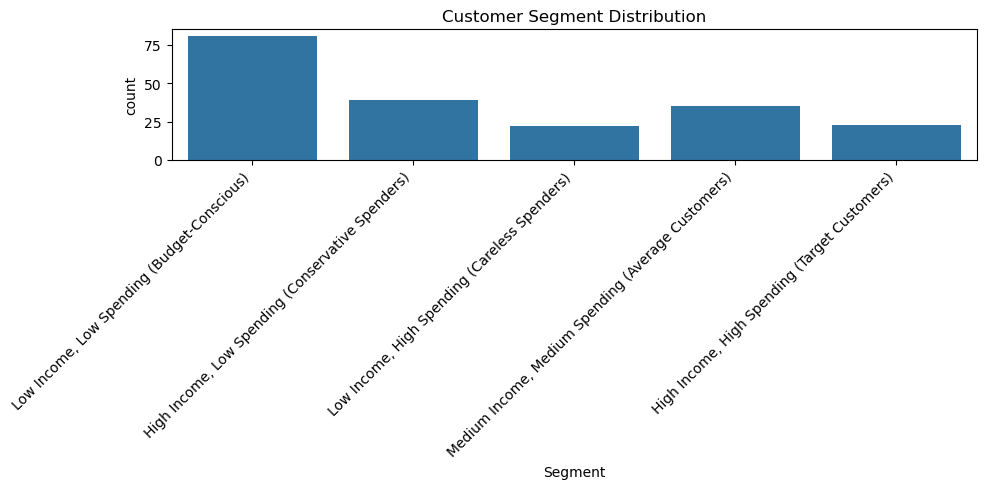

In [85]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Segment', data=df, order=cluster_profiles.values())
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
def assign_clusters(df, kmeans):
    """Add cluster labels to DataFrame"""
    df['Cluster'] = kmeans.labels_
    
    # Define cluster profiles
    cluster_profiles = {
        0: "Low Income, Low Spending (Budget-Conscious)",
        1: "High Income, Low Spending (Conservative Spenders)",
        2: "Low Income, High Spending (Careless Spenders)",
        3: "Medium Income, Medium Spending (Average Customers)",
        4: "High Income, High Spending (Target Customers)"
    }
    
    df['Segment'] = df['Cluster'].map(cluster_profiles)
    return df, cluster_profiles


In [89]:
# Step 6: Visualize results
def visualize_results(df, kmeans, scaler):
    """Create visualizations of customer segments"""
    # Create figure
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Customer segmentation
    plt.subplot(2, 2, (1, 2))
    sns.scatterplot(
        x='Annual Income (k$)', 
        y='Spending Score (1-100)', 
        data=df, 
        hue='Segment',
        palette='viridis',
        s=80,
        alpha=0.8
    )
    # Plot centroids
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=300, 
        c='red',
        marker='X',
        label='Centroids'
    )
    plt.title('Customer Segmentation', fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=12)
    plt.ylabel('Spending Score (1-100)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True)
    
    # Plot 2: Cluster distribution
    plt.subplot(2, 2, 3)
    segment_counts = df['Segment'].value_counts()
    plt.pie(
        segment_counts,
        labels=segment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('viridis', len(segment_counts))
    )
    plt.title('Segment Distribution', fontsize=14)
    plt.axis('equal')
    
    # Plot 3: Age distribution by segment
    plt.subplot(2, 2, 4)
    sns.boxplot(
        x='Segment',
        y='Age',
        data=df,
        palette='viridis',
        showfliers=False
    )
    plt.title('Age Distribution by Segment', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Plot 4: Gender distribution
    plt.figure(figsize=(10, 6))
    gender_segment = pd.crosstab(df['Segment'], df['Gender'], normalize='index') * 100
    gender_segment.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
    plt.title('Gender Distribution by Segment', fontsize=16)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender', loc='upper right')
    plt.tight_layout()
    plt.show()

In [91]:

# Step 7: Create prediction function
def predict_customer_segment(annual_income, spending_score, model, scaler, df, cluster_profiles):
    """Predict customer segment for new data"""
    # Create input array
    new_customer = pd.DataFrame(
        [[annual_income, spending_score]],
        columns=['Annual Income (k$)', 'Spending Score (1-100)']
    )
    
    # Scale input
    scaled_data = scaler.transform(new_customer)
    
    # Predict cluster
    cluster = model.predict(scaled_data)[0]
    segment = cluster_profiles[cluster]
    
    # Get cluster statistics
    cluster_data = df[df['Cluster'] == cluster]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = len(cluster_data)
    
    # Prepare results
    return {
        'cluster': cluster,
        'segment': segment,
        'avg_income': round(avg_income, 1),
        'avg_spending': round(avg_spending, 1),
        'segment_size': size,
        'percent_of_total': round(size / len(df) * 100, 1)
    }

CUSTOMER SEGMENTATION ANALYSIS
Data loaded successfully!
Shape: (200, 5) rows and columns

First 5 records:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Features scaled for clustering


C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Model trained successfully!


C:\Users\AKSHAY KUMAR\AppData\Local\Temp\ipykernel_32764\2517019609.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


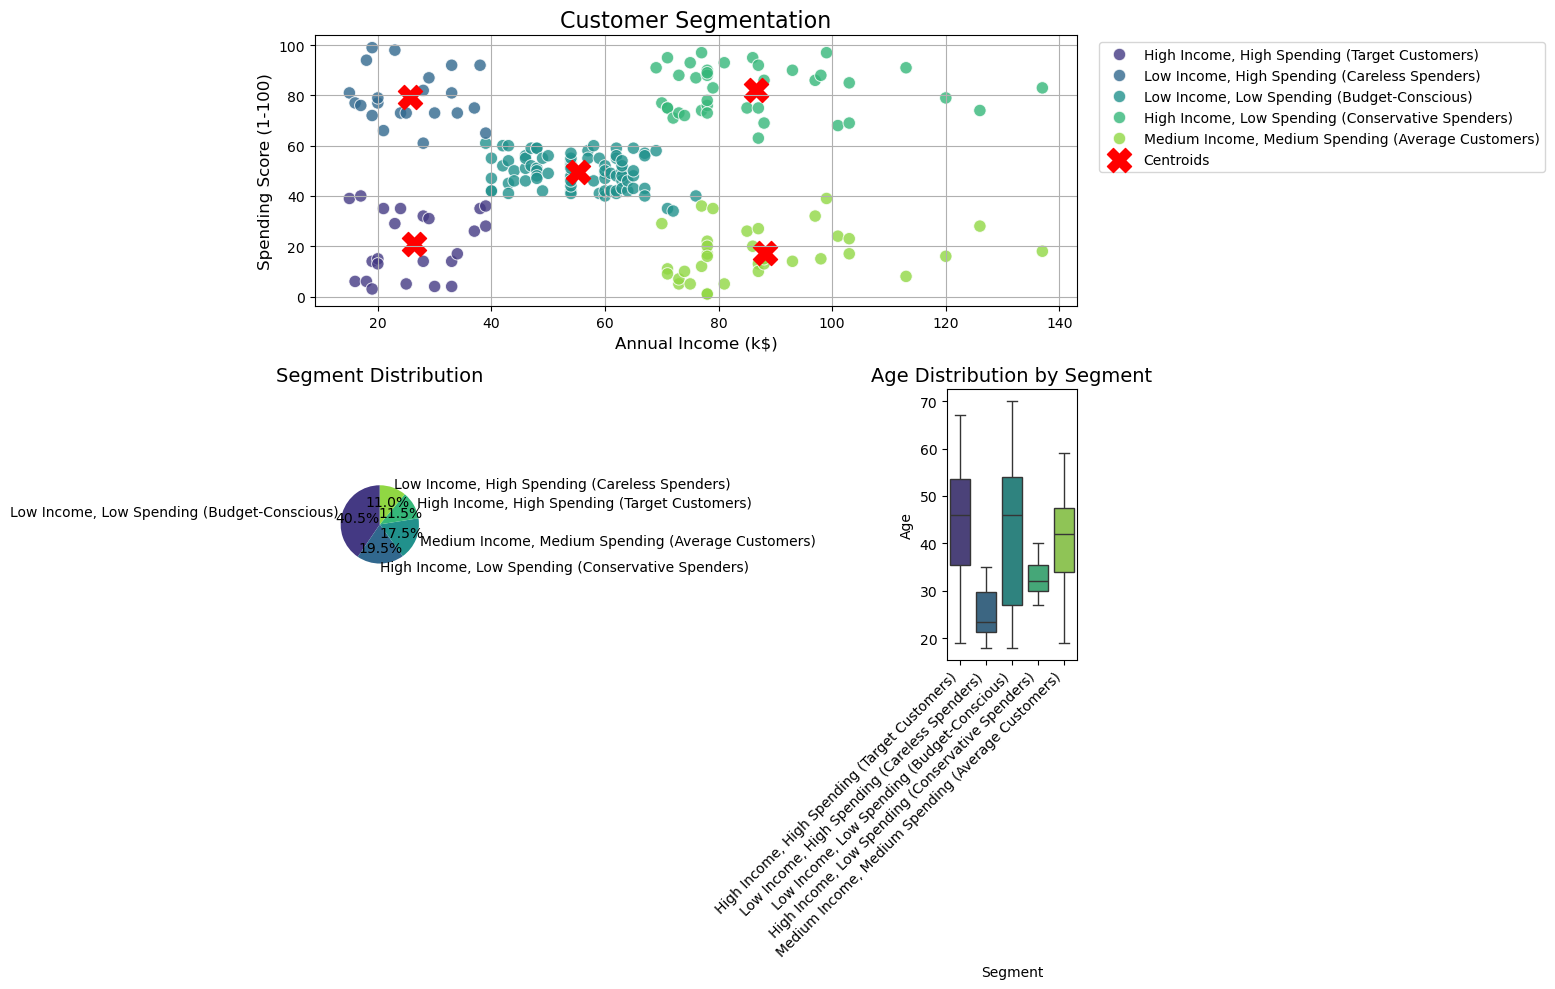

<Figure size 1000x600 with 0 Axes>

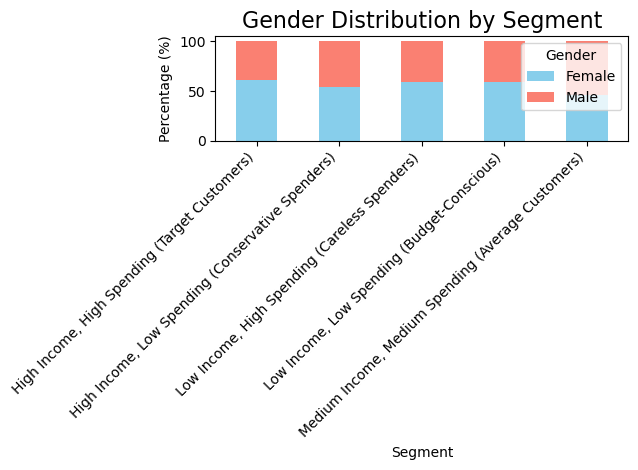


SEGMENT SUMMARY
                                                    Avg Income  Min Income  \
Segment                                                                      
Medium Income, Medium Spending (Average Customers)   88.200000          70   
High Income, Low Spending (Conservative Spenders)    86.538462          69   
Low Income, Low Spending (Budget-Conscious)          55.296296          39   
High Income, High Spending (Target Customers)        26.304348          15   
Low Income, High Spending (Careless Spenders)        25.727273          15   

                                                    Max Income  Avg Spending  \
Segment                                                                        
Medium Income, Medium Spending (Average Customers)         137     17.114286   
High Income, Low Spending (Conservative Spenders)          137     82.128205   
Low Income, Low Spending (Budget-Conscious)                 76     49.518519   
High Income, High Spending (Target C

Annual Income (thousands $):  79
Spending Score (1-100):  95



RESULT: High Income, Low Spending (Conservative Spenders)
- Cluster: 1
- Segment size: 39 customers
- Average income: $86.5k
- Average spending score: 82.1


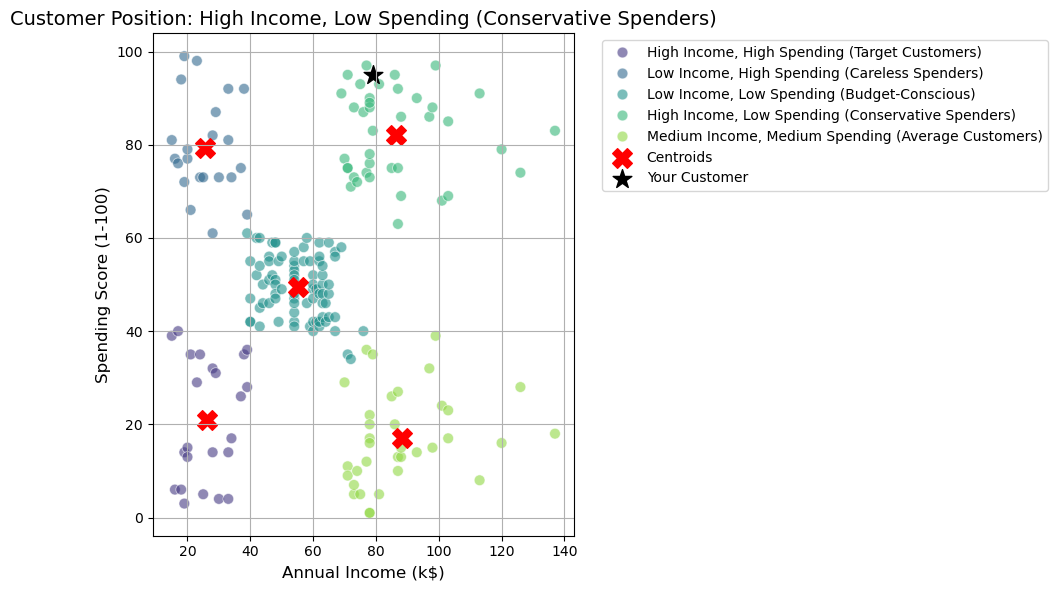


Predict another customer? (y/n):  y



Enter customer details:


Annual Income (thousands $):  1500
Spending Score (1-100):  100



RESULT: High Income, Low Spending (Conservative Spenders)
- Cluster: 1
- Segment size: 39 customers
- Average income: $86.5k
- Average spending score: 82.1


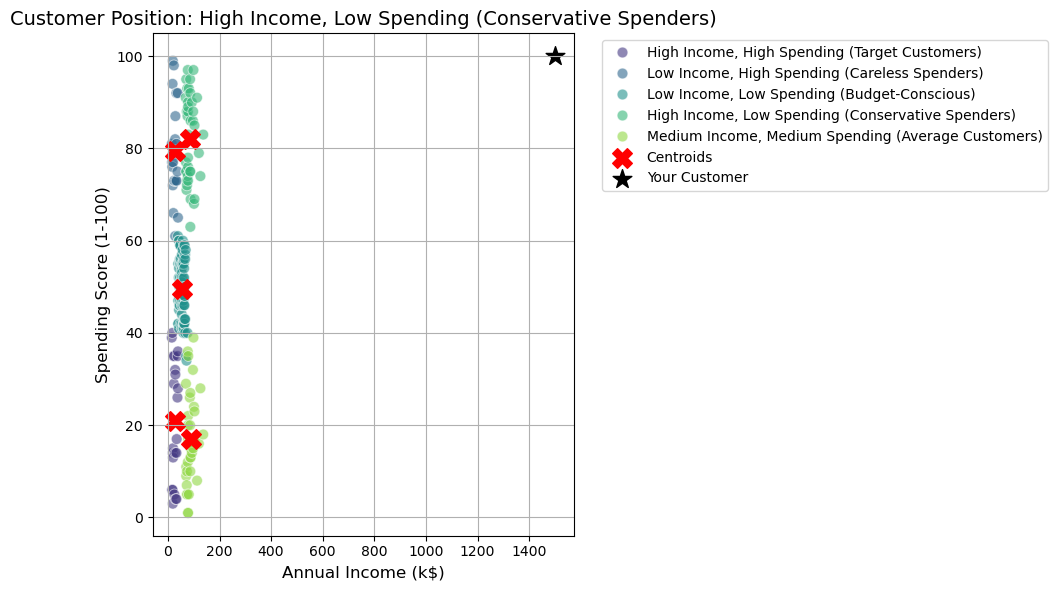


Predict another customer? (y/n):  y



Enter customer details:


Annual Income (thousands $):  750
Spending Score (1-100):  95



RESULT: High Income, Low Spending (Conservative Spenders)
- Cluster: 1
- Segment size: 39 customers
- Average income: $86.5k
- Average spending score: 82.1


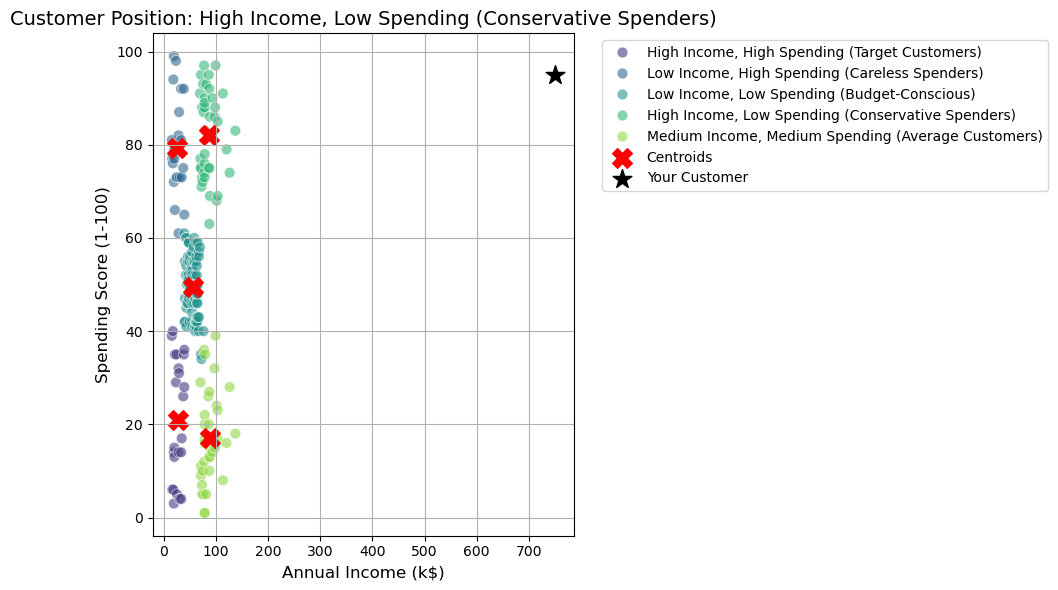


Predict another customer? (y/n):  y



Enter customer details:


Annual Income (thousands $):  125
Spending Score (1-100):  65



RESULT: High Income, Low Spending (Conservative Spenders)
- Cluster: 1
- Segment size: 39 customers
- Average income: $86.5k
- Average spending score: 82.1


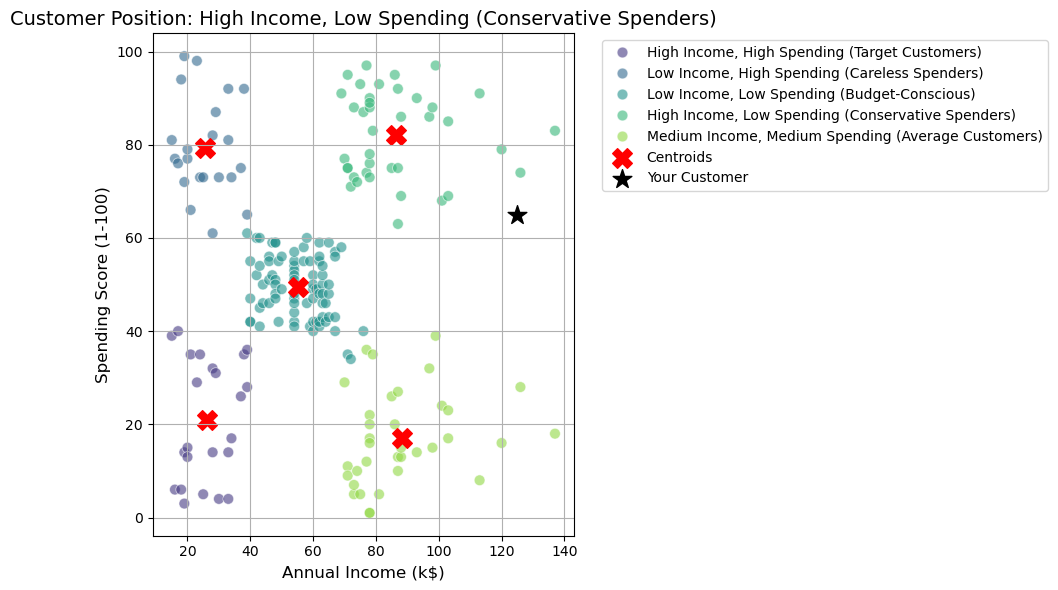

In [ ]:

# Step 8: Main function
def main():
    """Main program execution"""
    print("="*50)
    print("CUSTOMER SEGMENTATION ANALYSIS")
    print("="*50)
    
    # Load data
    df = load_data()
    
    # Preprocess data
    X, X_scaled, scaler = preprocess_data(df)
    
    # Train model
    kmeans = train_model(X_scaled)
    
    # Assign clusters
    df, cluster_profiles = assign_clusters(df, kmeans)
    
    # Visualize results
    visualize_results(df, kmeans, scaler)
    
    # Print cluster summary
    print("\n" + "="*50)
    print("SEGMENT SUMMARY")
    print("="*50)
    summary = df.groupby('Segment').agg({
        'Annual Income (k$)': ['mean', 'min', 'max'],
        'Spending Score (1-100)': ['mean', 'min', 'max'],
        'Age': 'mean',
        'CustomerID': 'count'
    })
    summary.columns = ['Avg Income', 'Min Income', 'Max Income', 
                       'Avg Spending', 'Min Spending', 'Max Spending',
                       'Avg Age', 'Count']
    summary['% of Total'] = (summary['Count'] / len(df)) * 100
    print(summary.sort_values('Avg Income', ascending=False))
    
    # Prediction examples
    print("\n" + "="*50)
    print("PREDICTION EXAMPLES")
    print("="*50)
    
    # Example customers
    customers = [
        (15, 39),   # Low income, medium spending
        (120, 15),  # High income, low spending
        (80, 85)    # Medium income, high spending
    ]
    
    for i, (income, spending) in enumerate(customers, 1):
        prediction = predict_customer_segment(income, spending, kmeans, scaler, df, cluster_profiles)
        print(f"\nExample {i}: Income ${income}k, Spending Score {spending}")
        print(f"Segment: {prediction['segment']}")
        print(f"Customers in segment: {prediction['segment_size']} ({prediction['percent_of_total']}%)")
        print(f"Segment averages: Income ${prediction['avg_income']}k, Spending {prediction['avg_spending']}")
    
    # Interactive prediction
    print("\n" + "="*50)
    print("INTERACTIVE SEGMENT PREDICTOR")
    print("="*50)
    
    while True:
        try:
            print("\nEnter customer details:")
            income = float(input("Annual Income (thousands $): "))
            spending = float(input("Spending Score (1-100): "))
            
            # Get prediction
            prediction = predict_customer_segment(income, spending, kmeans, scaler, df, cluster_profiles)
            
            # Print results
            print(f"\nRESULT: {prediction['segment']}")
            print(f"- Cluster: {prediction['cluster']}")
            print(f"- Segment size: {prediction['segment_size']} customers")
            print(f"- Average income: ${prediction['avg_income']}k")
            print(f"- Average spending score: {prediction['avg_spending']}")
            
            # Visualize position
            plt.figure(figsize=(10, 6))
            sns.scatterplot(
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=df, 
                hue='Segment',
                palette='viridis',
                s=60,
                alpha=0.6,
                legend='brief'
            )
            # Plot centroids
            centroids = scaler.inverse_transform(kmeans.cluster_centers_)
            plt.scatter(
                centroids[:, 0],
                centroids[:, 1],
                s=200, 
                c='red',
                marker='X',
                label='Centroids'
            )
            # Plot new customer
            plt.scatter(
                income, 
                spending, 
                s=200, 
                c='black',
                marker='*',
                label='Your Customer'
            )
            plt.title(f'Customer Position: {prediction["segment"]}', fontsize=14)
            plt.xlabel('Annual Income (k$)', fontsize=12)
            plt.ylabel('Spending Score (1-100)', fontsize=12)
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
            # Continue?
            if input("\nPredict another customer? (y/n): ").lower() != 'y':
                print("Exiting program...")
                break
                
        except ValueError:
            print("Invalid input! Please enter numbers only.")
        except Exception as e:
            print(f"Error: {str(e)}")

# Execute program
if __name__ == "__main__":
    main()